In [1]:
# Implementar algoritmo de agrupación (por ejemplo, K-Means)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd 

In [2]:
df = pd.read_csv('data_videos/dataframes/data.csv' )
df.head(5)

,titulo_video,nombre_canal,keywords,lngs,bigrams,trigrams
0,AMT2 - Extracting Emails from your Gmail Inbox...,DigitalSreeni,"['amt2', 'extracting', 'emails', 'gmail', 'inb...",en,"[('amt2', 'extracting'), ('extracting', 'email...","[('amt2', 'extracting', 'emails'), ('extractin..."
1,Read emails with Python + Gmail API (part 1),ian samir,"['read', 'emails', 'python', 'gmail', 'api', '...",en,"[('read', 'emails'), ('emails', 'python'), ('p...","[('read', 'emails', 'python'), ('emails', 'pyt..."
2,Logra Más Con Menos Esfuerzo - Esencialismo de...,Mis Propias Finanzas,"['logra', 'menos', 'esfuerzo', 'esencialismo',...",es,"[('logra', 'menos'), ('menos', 'esfuerzo'), ('...","[('logra', 'menos', 'esfuerzo'), ('menos', 'es..."
3,Estratégia de trading con ChatGPT 4 Code Inter...,Rodrigo Prieto,"['estratégia', 'trading', 'chatgpt', '4', 'cod...",es,"[('estratégia', 'trading'), ('trading', 'chatg...","[('estratégia', 'trading', 'chatgpt'), ('tradi..."
4,AI & Machine Learning in Finance: AI Applicati...,Swedish House of Finance,"['ai', 'machine', 'learning', 'finance', 'ai',...",en,"[('ai', 'machine'), ('machine', 'learning'), (...","[('ai', 'machine', 'learning'), ('machine', 'l..."


In [3]:
df_all_keywords = df['keywords'].to_list()
df_all_keywords = [eval(item) for item in df_all_keywords]
# df_all_keywords = flatten_list(df_all_keywords)
# Unir todas las listas en una sola lista
clean_titles = [' '.join(sublist) for sublist in df_all_keywords]
clean_titles[:5]

['amt2 extracting emails gmail inbox using python',
 'read emails python gmail api part 1',
 'logra menos esfuerzo esencialismo greg mckeown',
 'estratégia trading chatgpt 4 code interpreter',
 'ai machine learning finance ai applications financial industry panel discussion']

In [4]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8,
                                min_df=5,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

In [5]:
vectors = vectorizer.fit_transform(clean_titles)

In [6]:
print (vectors[0])

  (0, 78)	0.5888887454301757
  (0, 95)	0.8082141087024366


In [7]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['10', '2022', '2023', '250', '3d', 'advanced', 'ai', 'api', 'app',
       'aprende', 'aprender', 'architecture', 'arduino', 'arm',
       'arquitectura', 'artificial', 'backend', 'beginners', 'best',
       'build', 'building', 'chatgpt', 'clase', 'clean', 'cloud', 'code',
       'computer', 'computer vision', 'control', 'course', 'curso',
       'data', 'data science', 'datos', 'deep', 'deep learning', 'delta',
       'delta robot', 'design', 'detection', 'docker', 'documental',
       'engineering', 'english', 'esp32', 'español', 'explained',
       'fastapi', 'funciona', 'google', 'hacer', 'industrial', 'inglés',
       'inteligencia', 'introducción', 'iot', 'learn', 'learning',
       'machine', 'machine learning', 'make', 'matlab', 'mejor',
       'microservices', 'microservicios', 'motion', 'motor', 'mundo',
       'notion', 'object', 'opencv', 'parte', 'paso', 'pi', 'plc',
       'programming', 'project', 'projects', 'python', 'rabbitmq',
       'raspberry', 'raspberry pi

In [8]:
dense = vectors.todense()
denselist = dense.tolist()


In [9]:
all_keywords = []
for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)

In [10]:
print ("Original Text:")
print (df.titulo_video[0]+"\n")

print ("Cleaned Text:")
print (clean_titles[0]+"\n")

print ("Only Keywords Text:")
print (all_keywords[0])

Original Text:
AMT2 - Extracting Emails from your Gmail Inbox using python

Cleaned Text:
amt2 extracting emails gmail inbox using python

Only Keywords Text:
['python', 'using']


## Kmeans Cluestering 

In [11]:
true_k = 5

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)
model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [12]:
i = 0
for cluster in order_centroids:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (terms[keyword])
    print ("")
    i=i+1

Cluster 0
data
data science
science
python
using
learn
project
engineering
course
build

Cluster 1
python
robot
tutorial
fastapi
course
api
using
10
control
inglés

Cluster 2
raspberry
raspberry pi
pi
opencv
using
python
esp32
curso
motor
robot

Cluster 3
learning
machine
machine learning
python
data
ai
best
use
app
data science

Cluster 4
curso
industrial
python
clase
parte
robots
español
2022
aprende
docker



## Ploting 

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [14]:
kmean_indices = model.fit_predict(vectors)

pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(vectors.toarray())
colors = ["r", "b", "m", "y", "c"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

In [15]:
kmean_indices.shape

(3100,)

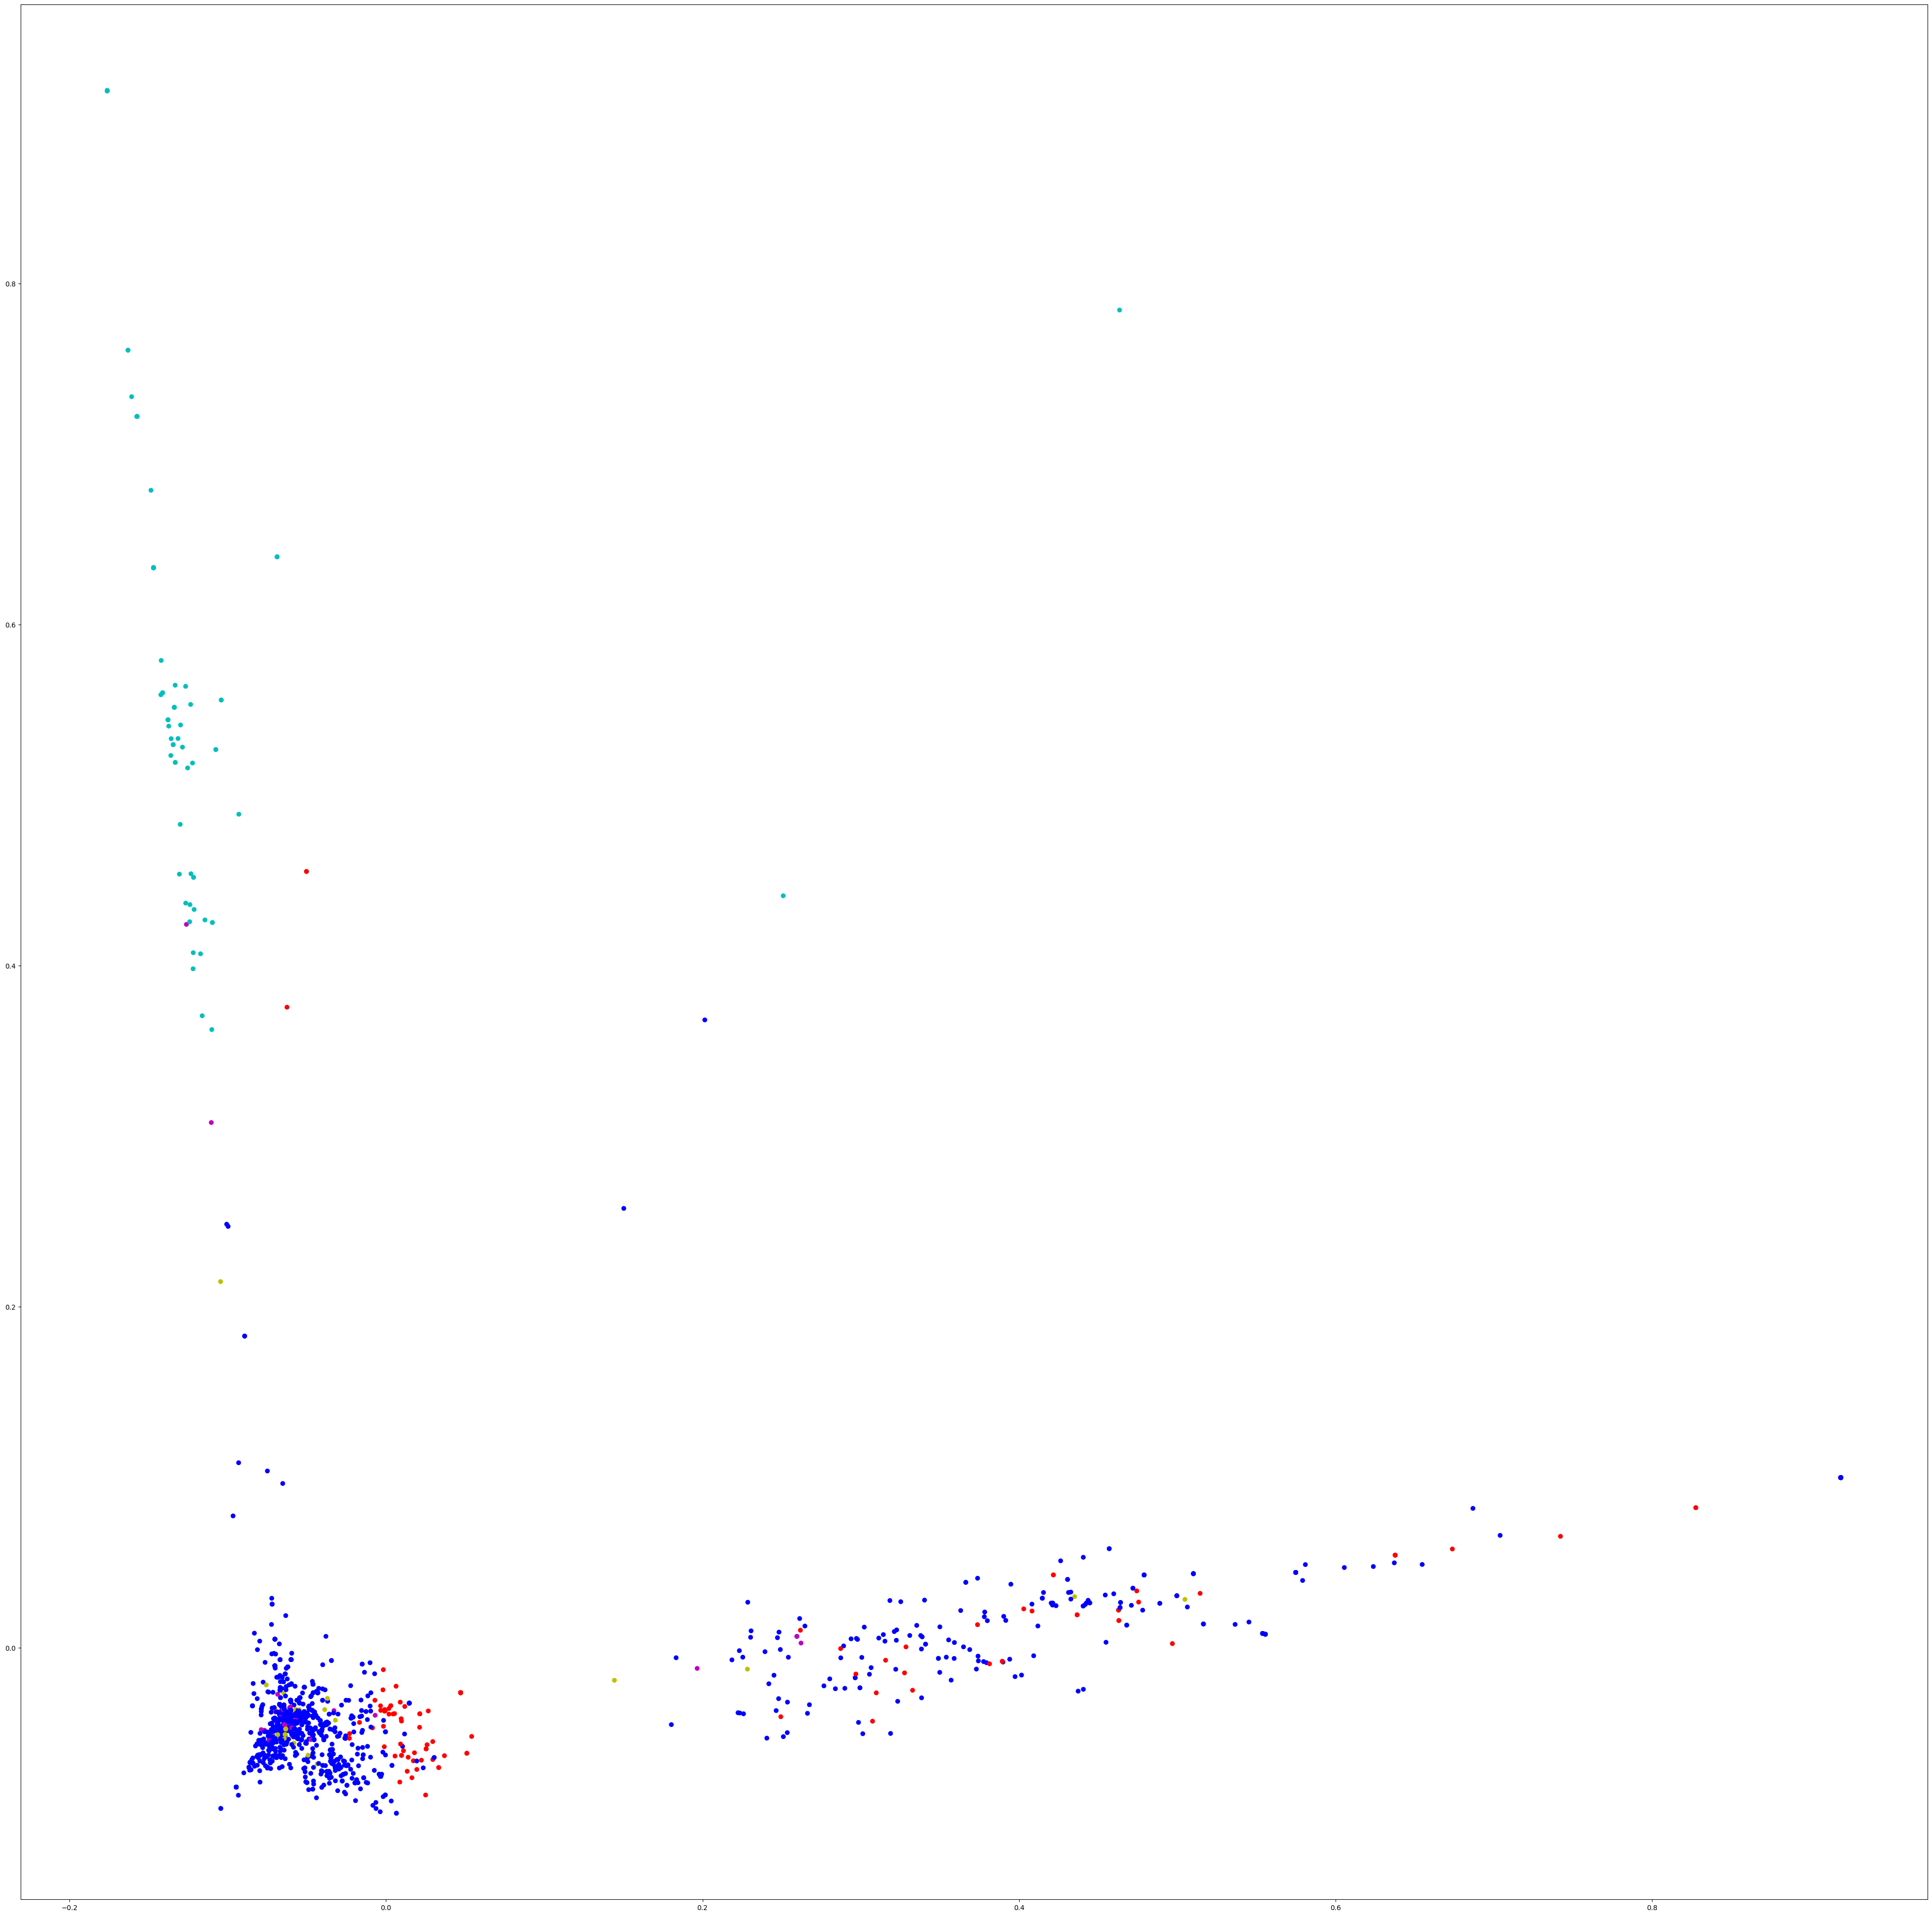

In [16]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119916 (\N{MATHEMATICAL BOLD ITALIC CAPITAL E}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119935 (\N{MATHEMATICAL BOLD ITALIC CAPITAL X}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119927 (\N{MATHEMATICAL BOLD ITALIC CAPITAL P}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 119923 (\N{MATHEMATICAL BOLD ITALIC CAPITAL L}) missing from current font.
  func(*args, **kwargs)
c:\Users\Usuario\Documents\Jhonier\proyectos_personales\Scra

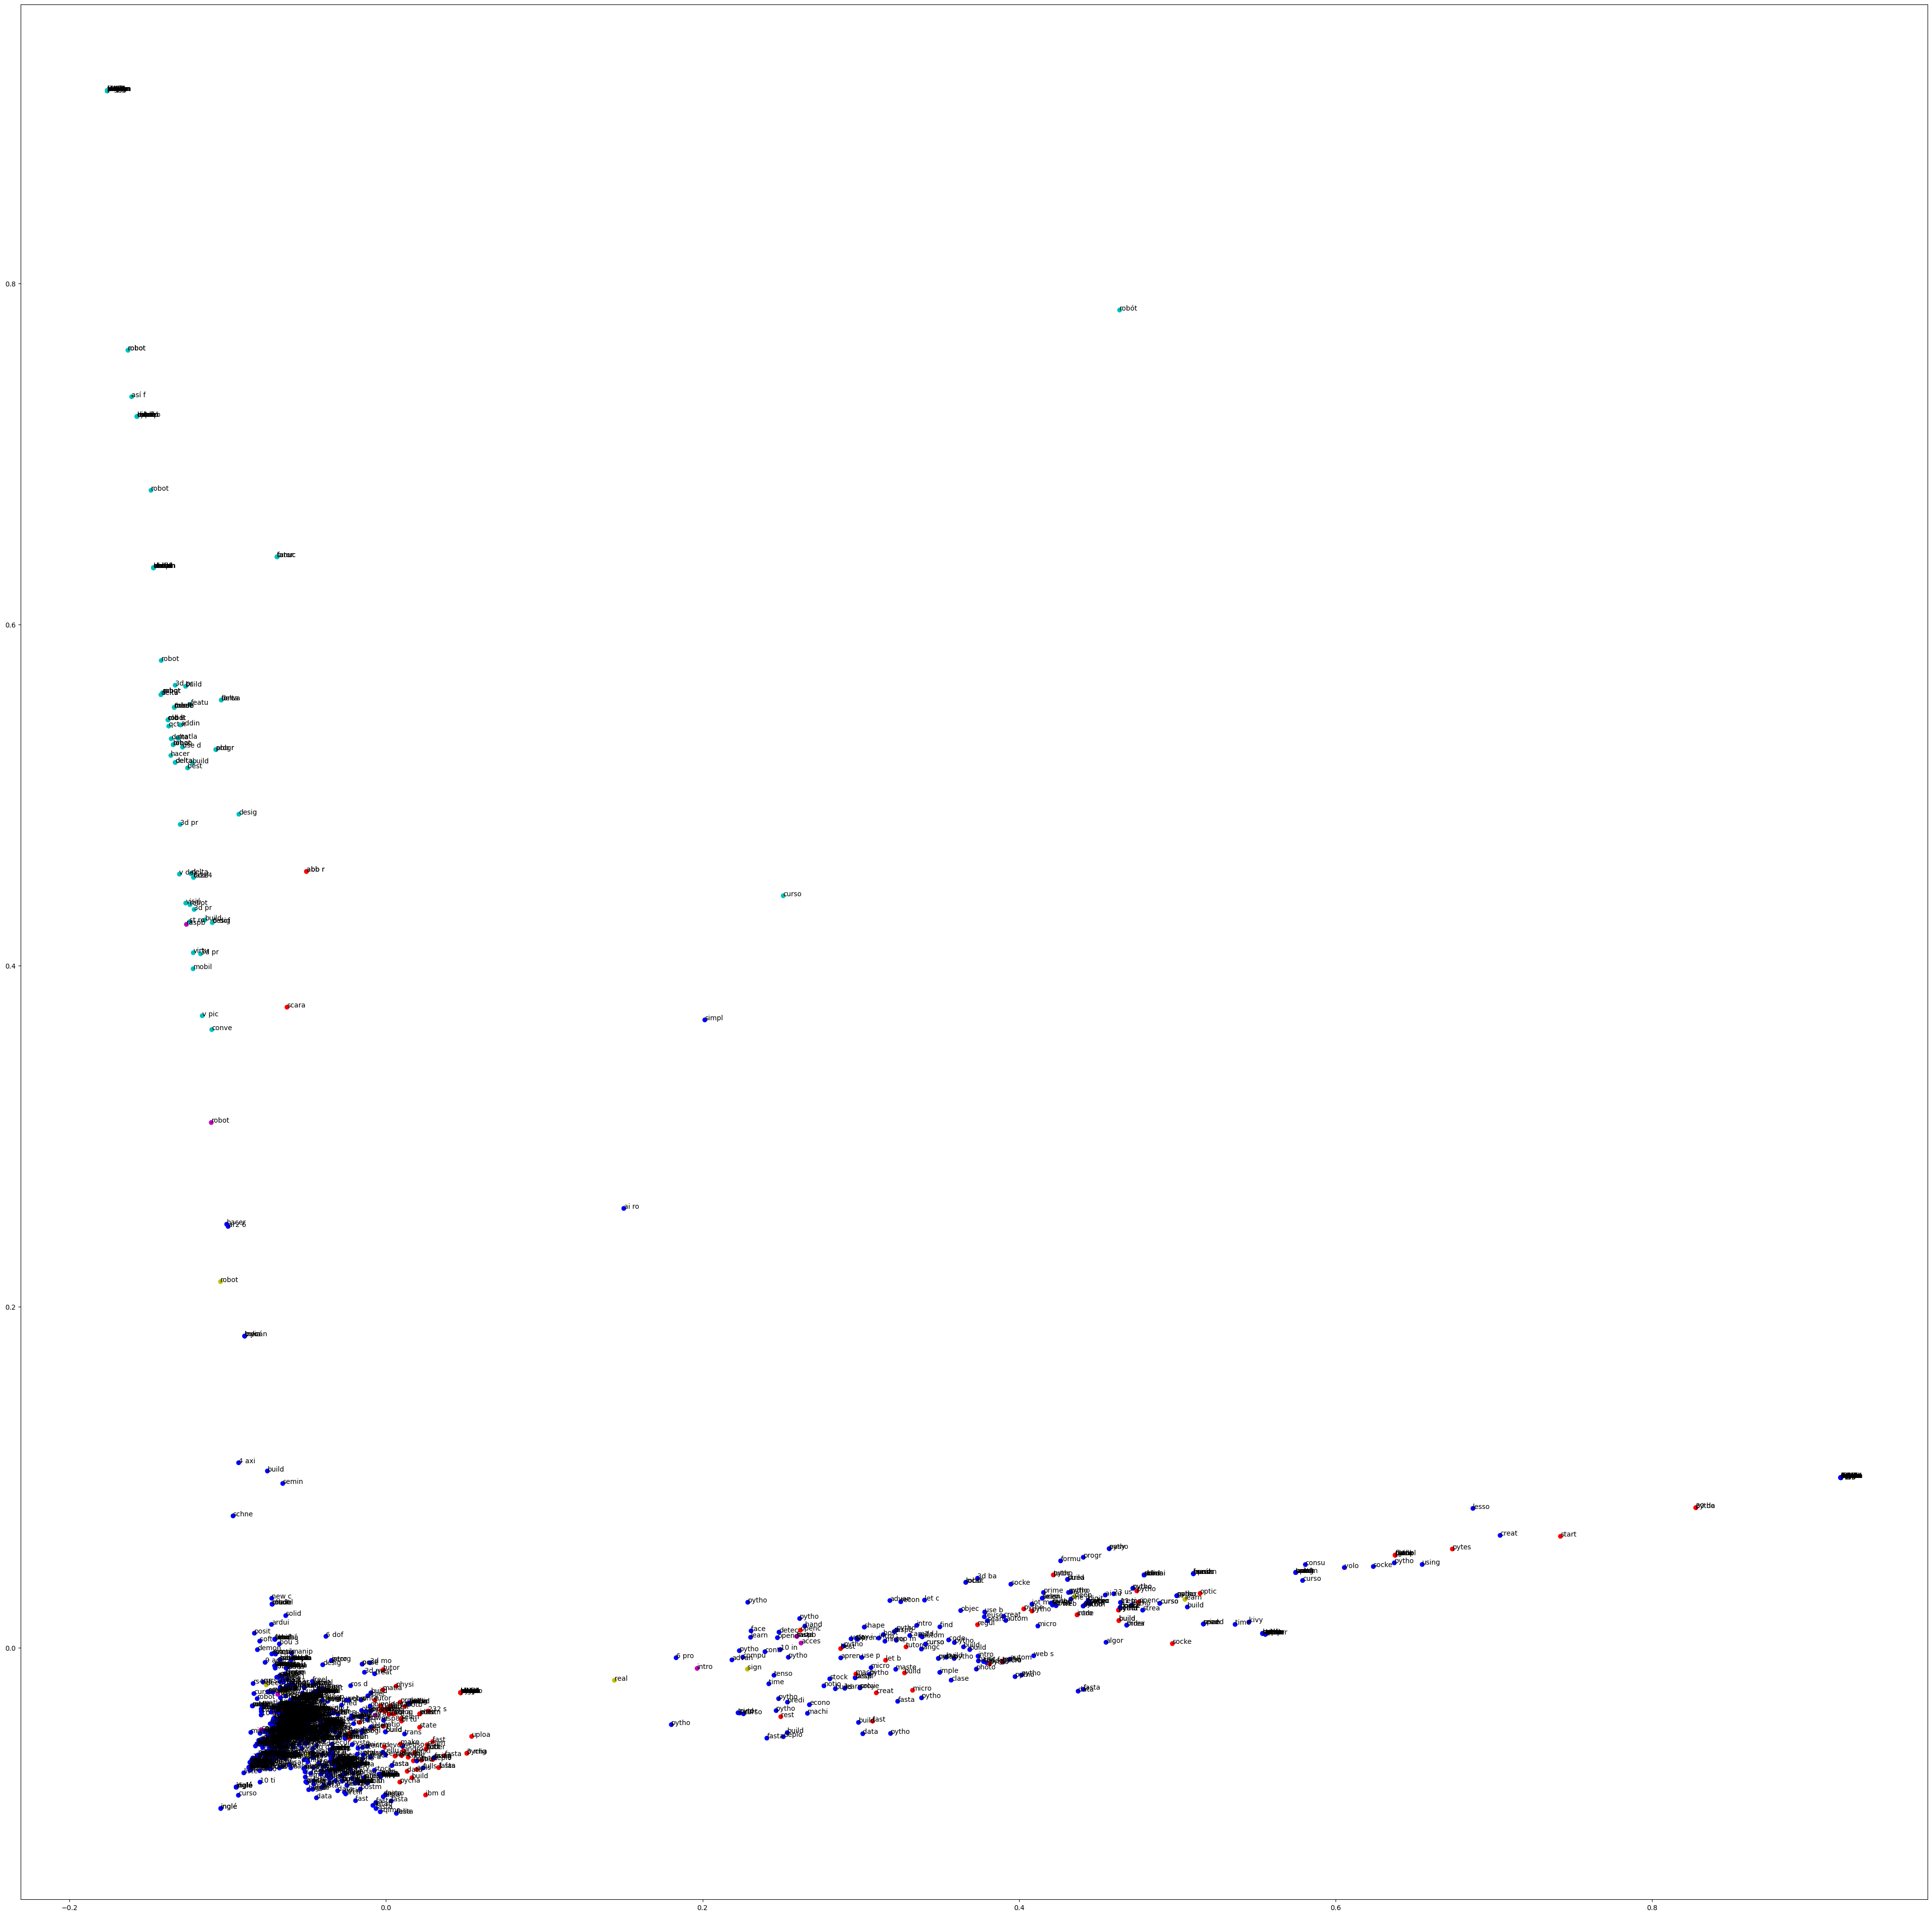

In [17]:
fig, ax = plt.subplots(figsize=(50, 50))
ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
for i, txt in enumerate(clean_titles):
    ax.annotate(txt[0:5], (x_axis[i], y_axis[i]))

# LDA 

In [18]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [19]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(clean_titles)
print (lemmatized_texts[0][0:90])

amt2 extract email gmail inbox use python


In [20]:

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['amt', 'extract', 'email', 'gmail', 'inbox', 'use', 'python']


In [21]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]
amt


In [28]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10, # 80 
                                           alpha="auto", 
                                           per_word_topics= True                                           
                                           )

In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis


c:\Users\Usuario\Documents\Jhonier\proyectos_personales\ScrapyTube\venv\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.213306 -0.021859       1        1  23.563891
2      0.097110  0.209130       2        1  22.356790
0     -0.205505 -0.126109       3        1  20.695364
3     -0.159268  0.145119       4        1  16.899971
1      0.054358 -0.206282       5        1  16.483984, topic_info=            Term        Freq       Total Category  logprob  loglift
599        robot  117.000000  117.000000  Default  30.0000  30.0000
21         learn   85.000000   85.000000  Default  29.0000  29.0000
725        clase   70.000000   70.000000  Default  28.0000  28.0000
6            use   68.000000   68.000000  Default  27.0000  27.0000
62      tutorial   60.000000   60.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
433     automate    8.378486    9.125571   Topic5  -5.3206   1.7174
309         time    8.335872    9.086371   Topic5  -5.3257   1.7166
93          home    8.595620    9.371947   Topic5  -5.2950   1.7163
1516      ingles    7.937553    8.691995   Topic5  -5.3747   1.7120
2905  platzilive   12.414936   13.688284   Topic5  -4.9274   1.7051

[185 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
590       1  0.923829       advanced
16        3  0.974574             ai
667       4  0.903202       analisis
1969      2  0.941876        android
3201      1  0.079368        animado
...     ...       ...            ...
784       2  0.950774           vida
175       2  0.898524          video
518       3  0.987765         vision
2617      5  0.959156  visualpolitik
397       4  0.937521           work

[160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 1, 4, 2])

In [26]:
coherence_model_lda= CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v' )
coherence_lda = coherence_model_lda.get_coherence()
print(f'coherence_lda= {coherence_lda}')

coherence_lda= 0.5602057754683472


In [27]:
lda_model.print_topics()

[(29,
  '0.000*"construction" + 0.000*"liquid" + 0.000*"comunicacione" + 0.000*"dollar" + 0.000*"contractor" + 0.000*"modal" + 0.000*"calm" + 0.000*"pressure" + 0.000*"phrase" + 0.000*"quemando"'),
 (1,
  '0.000*"construction" + 0.000*"liquid" + 0.000*"comunicacione" + 0.000*"dollar" + 0.000*"contractor" + 0.000*"modal" + 0.000*"calm" + 0.000*"pressure" + 0.000*"phrase" + 0.000*"quemando"'),
 (26,
  '0.026*"sistema" + 0.000*"dollar" + 0.000*"construction" + 0.000*"modal" + 0.000*"grammar" + 0.000*"comunicacione" + 0.000*"phrase" + 0.000*"pressure" + 0.000*"quemando" + 0.000*"contractor"'),
 (14,
  '0.021*"codigo" + 0.000*"dollar" + 0.000*"modal" + 0.000*"grammar" + 0.000*"comunicacione" + 0.000*"contractor" + 0.000*"quemando" + 0.000*"liquid" + 0.000*"alphago" + 0.000*"construction"'),
 (7,
  '0.082*"home" + 0.028*"diseno" + 0.000*"arduino" + 0.000*"printer" + 0.000*"dollar" + 0.000*"comunicacione" + 0.000*"grammar" + 0.000*"contractor" + 0.000*"pressure" + 0.000*"quemando"'),
 (5,
  '

with spacy 

In [25]:
'''
import spacy

# Cargar modelo de lenguaje spaCy
# es_core_news_lg
# en_core_web_sm
nlp = spacy.load("en_core_web_lg")

# Crear un knowledge graph
knowledge_graph = {}

for index, row in df.iterrows():
    doc = nlp(row['titulo_video'])
    keywords = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    for keyword in keywords:
        if keyword not in knowledge_graph:
            knowledge_graph[keyword] = set()
        knowledge_graph[keyword].add(row['titulo_video'])

# Imprimir el knowledge graph
for keyword, related_videos in knowledge_graph.items():
    print(f"{keyword}: {related_videos}")
    '''

'\nimport spacy\n\n# Cargar modelo de lenguaje spaCy\n# es_core_news_lg\n# en_core_web_sm\nnlp = spacy.load("en_core_web_lg")\n\n# Crear un knowledge graph\nknowledge_graph = {}\n\nfor index, row in df.iterrows():\n    doc = nlp(row[\'titulo_video\'])\n    keywords = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]\n    for keyword in keywords:\n        if keyword not in knowledge_graph:\n            knowledge_graph[keyword] = set()\n        knowledge_graph[keyword].add(row[\'titulo_video\'])\n\n# Imprimir el knowledge graph\nfor keyword, related_videos in knowledge_graph.items():\n    print(f"{keyword}: {related_videos}")\n    '